# Matrices

## Définitions

````{prf:definition} Matrice 
```{index} Matrice
```
Une matrice $m\times n$ à coefficients réels est un tableau de
scalaires rangés en $m$ lignes et $n$ colonnes.
````

La définition de matrice se fait simplement en Python à l'aide de la librairie <a href="https://numpy.org" target="_blank">numpy</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[4, 3],[2,1]])
B = np.array([[3, 0, 4],[-1, -2, 1]])
C = np.array([[-2, 1],[4, 1]])
D = np.array([[2],[6]])

Les matrices servent principalement à représenter des transformations
linéaires de $\mathbb R^n$ dans $\mathbb R^m$. 

On notera $a_{ij}$ les éléments de la matrice ${\bf A}$,
$i\in [\![1,m]\!]$, $j\in [\![1,n]\!]$. La matrice ${\bf A}$ représente
la transformation linéaire de $\mathbb R^n$ dans $\mathbb R^m$ suivante

$(\forall {\bf x}\in\mathbb R^n)\ {\bf y}=A{\bf x}\ \Leftrightarrow\ 
{\bf y}\in\mathbb R^m\ \mbox{et}\ (\forall i\in  [\![ 1, m]\!])\quad y_i=a_{i1}x_1+\cdots+a_{i n}x_n = \displaystyle\sum_{j=1}^n a_{ij}x_j$

```{margin} 
![](./images/translin.png)
```



Si on note ${\bf A_{\bullet j}}$, $j\in [\![1,n]\!]$ les colonnes de
${\bf A}$ et $A_{i\bullet}$, $i\in[\![1,m]\!]$ les vecteurs lignes de
${\bf A}$, la transformation peut aussi s'écrire des deux manières
suivantes :
${\bf y}=\displaystyle\sum_{j=1}^nx_jA_{\bullet j}\qquad\mbox{ou}\qquad
(\forall i\in[\![1,m]\!])\ y_i=A_{i\bullet}^\top x.$

Dans le cas où les colonnes de ${\bf A}$ sont les vecteurs de la base
canonique, la matrice est appelée matrice identité et est notée
${\bf \mathbb I}$.

Comme mentionné précédemment, l'ensemble $\mathcal{M}_{m,n}(\mathbb{R})$
des matrices de taille $m\times n$ à coefficients réels est un espace
vectoriel pour les lois '+' et '.' :

-   $(\forall  {\bf A}, {\bf B}\in \mathcal{M}_{m,n}(\mathbb{R}))(\forall i\in  [\![ 1,m]\!])(\forall j\in  [\![ 1, n]\!])\quad \left ( {\bf A}+ {\bf B}\right )_{i,j} =\left ( {\bf A}\right )_{i,j} + \left ( {\bf B}\right )_{i,j}$

-   $(\forall \lambda\in\mathbb R)(\forall {\bf A}\in \mathcal{M}_{m,n}(\mathbb{R}))(\forall i\in  [\![ 1, m]\!])(\forall j\in  [\![ 1, n]\!])\quad  \left ( {\bf \lambda.A}\right )_{i,j} =\lambda\left ( {\bf A}\right )_{i,j}$

et en Python

In [2]:
import numpy as np
print(3*A,'\n')
print(A+C,'\n')

[[12  9]
 [ 6  3]] 

[[2 4]
 [6 2]] 



Lorsque $m=n$, $\mathcal{M}_{m,n}(\mathbb{R})$ est noté
$\mathcal{M}_{n}(\mathbb{R})$. C'est l'espace des matrices carrées de
taille $n$.

Voici quelques exemples de transformations linéaires.


### Addition

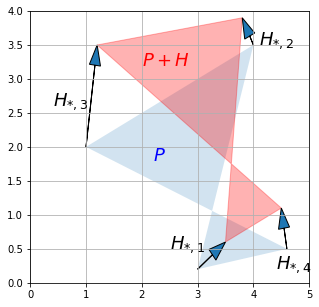

In [3]:
from matplotlib.patches import Polygon

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
    
P_moved = P + H
plt.figure(figsize=(5,5))

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Multiplication par un scalaire

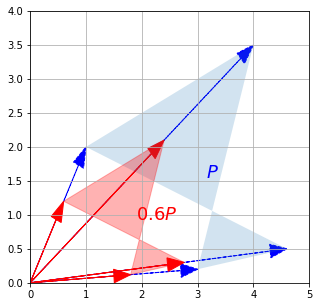

In [4]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plt.figure(figsize=(5,5))
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Rotation

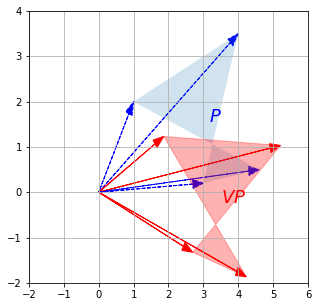

In [5]:
angle30 = 30 * np.pi / 180  
R = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [-np.sin(angle30), np.cos(angle30)]
    ])
P_rotated = R.dot(P)
plt.figure(figsize=(5,5))
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

### Transvection

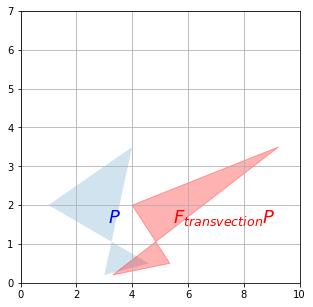

In [6]:
F_transvection = np.array([
        [1, 1.5],
        [0, 1]
    ])
plt.figure(figsize=(5,5))
plot_transformation(P, F_transvection.dot(P), "$P$", "$F_{transvection} P$",
                    axis=[0, 10, 0, 7])
plt.show()

### Compression

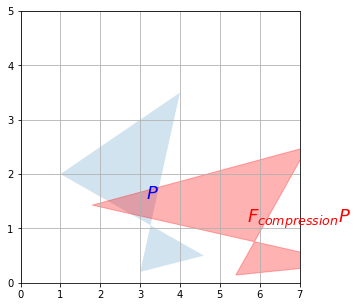

In [7]:
F_compression = np.array([
        [1.8, 0],
        [0, 1/1.4]
    ])
plt.figure(figsize=(5,5))
plot_transformation(P, F_compression.dot(P), "$P$", "$F_{compression} P$",
                    axis=[0, 7, 0, 5])
plt.show()

### Réflexion

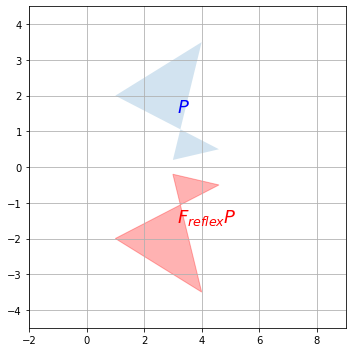

In [8]:
F_reflex = np.array([
        [1, 0],
        [0, -1]
    ])
plt.figure(figsize=(5,5))
plot_transformation(P, F_reflex.dot(P), "$P$", "$F_{reflex} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.tight_layout()

Pour évaluer les effets d'une transformation linéaire sur la norme d'un vecteur, 
on s'arrange pour utiliser des normes de matrices subordonnées
aux normes vectorielles, dans le sens suivant :

$\|{\bf A}\|=\displaystyle\sup_{{\bf x}\neq {\bf 0}}\frac{\|{\bf Ax}\|}{\|{\bf x}\|}=\displaystyle\sup_{\|{\bf x}\|=1}\|{\bf Ax}\|$


où $\|{\bf A}\|$ définit une norme subordonnée à la norme vectorielle utilisée dans le calcul des normes vectorielles $\|{\bf x}\|$ et 
$\|{\bf Ax}\|$. On retrouve la définition usuelle d'une norme d'application linéaire. 
On a alors la relation $\|{\bf Ax}\|\leq \|{\bf A}\|\|{\bf x}\|$ pour tout ${\bf x}$.
```{index} Norme matricielle;subordonnée
```

```{prf:remark}
1. Le sup ci-dessus doit être pris dans $\mathbb{C}^n$, mais coïncide avec le sup 
dans $\mathbb R^n$ pour les normes $L_1,L_2$ et $L_\infty$.
2. Par compacité de la sphère unité, le sup est atteint  pour un ${\bf x}$ non nul.
```

```{prf:property} Propriétés des normes subordonnées
1. $\|{\bf A}\|=\inf\left \{\rho / \|{\bf Ax}\|\leq\rho \|{\bf x}\|\right \}$
2. $\|\mathbb I\|=1$
```` 



```{prf:example}
1. On vérifie que les normes matricielles subordonnées aux normes 
$L_1$ et $L_\infty$ sont données par $\|{\bf A}\|_1=\displaystyle\max_j\displaystyle\sum_i|a_{ij}|$ et
$\|{\bf A}\|_\infty=\displaystyle\max_i\displaystyle\sum_j|a_{ij}|$
 2. La norme matricielle subordonnée à la norme euclidienne est 
$\|{\bf A}\|_2=\left[\lambda_{max}\right]^\frac{1}{2}$, où $\lambda_{max}$ est la plus grande 
valeur propre de ${\bf A^\top} {\bf A}$.
3. La norme euclidienne étant difficile à calculer, on lui préfère souvent 
la norme de la trace ou norme de Frobenius : 

$
\|{\bf A}\|_F=\left (Tr({\bf A^\top} {\bf A})\right)^\frac{1}{2}
           =\left (\displaystyle\sum_i\displaystyle\sum_ja_{ij}^2\right )^\frac{1}{2}.
$ 

Cette norme n'est subordonnée à aucune norme vectorielle sur $\mathbb R^n$.
```
```{index} Norme matricielle;de Frobenius
```



## Matrice transposée

````{prf:definition} Transposée 
```{index} Matrice ; transposée
```
```{index} Transposée
```
Soit ${\bf A}\in \mathcal{M}_{m,n}(\mathbb{R})$. On appelle
matrice transposée de ${\bf A}$, et on note ${\bf A^\top}$, l'unique
matrice de $\mathcal{M}_{n,m}(\mathbb{R})$ telle que :
$(\forall  {\bf x} \in\mathbb R^n)\ (\forall  {\bf y} \in\mathbb R^m)\quad{\bf y}^\top ({\bf A}{\bf x})=({\bf A^\top }{\bf y})^\top {\bf x} 
\label{MatriceTransposee}$
````

Le premier produit scalaire est dans $\mathbb R^m$ et le second dans
$\mathbb R^n$. On montre alors que la matrice ${\bf A^\top}$ a pour lignes
les colonnes de ${\bf A}$ (et donc pour colonnes les lignes de
${\bf A}$). On remarque que la notation dans est cohérente avec celle du produit
scalaire.

${\bf A} = \begin{pmatrix}
1&2&3\\4&5&6\\7&8&9
\end{pmatrix}$ ${\bf A^T} = \begin{pmatrix}
1&4&7\\2&5&8\\3&6&9
\end{pmatrix}$

In [9]:
A = np.array([[5, 4, 0],[1, 8, 3],[6, 7, 2]])
print('A = \n',A,'\n' 
)
print('A^T = \n',A.transpose())

A = 
 [[5 4 0]
 [1 8 3]
 [6 7 2]] 

A^T = 
 [[5 1 6]
 [4 8 7]
 [0 3 2]]


```{prf:remark}
:class: dropdown
Dans le cas d'une matrice symétrique, on a ${\bf A} = {\bf A^\top}$.
```

## Trace, déterminant

````{prf:definition} Trace 
```{index} Trace
```
Soit ${\bf A}\in\mathcal{M}_n(\mathbb R)$. La trace de ${\bf A}$,
notée $Tr({\bf A})$, est par définition :
$Tr({\bf A}) = \displaystyle\sum_{i=1}^n a_{ii}$
````

In [10]:
print("Trace de A : ", np.trace(A))

Trace de A :  15


On démontre sans difficulté les propriétés suivantes pour toutes
matrices ${\bf A}$ et ${\bf B}$ avec les bonnes dimensions :

````{prf:property} Propriétés de la trace

1.  $Tr({\bf A})$=$Tr({\bf A^T})$

2.  $Tr({\bf AB})$=$Tr({\bf BA})$

3.  $Tr({\bf A+B})$=$Tr({\bf A}) + Tr({\bf B})$

4.  $(\forall {\bf x}\in \mathbb R^n)\ {\bf x^Tx} = Tr({\bf xx^T})$
````

````{prf:definition} Déterminant 
```{index} Déterminant
```
oit ${\bf A}\in\mathcal{M}_n(\mathbb R)$. Le déterminant de
${\bf A}$, noté $det({\bf A})$ est défini récursivement comme suit :

1.  si $n=1$, $det({\bf A})=a_{11}$

2.  si $n>1$
    $det({\bf A})=\displaystyle\sum_{j=1}^n (-1)^{j+1}det ({\bf A_{1j}})$

où ${\bf A_{1j}}\in \mathcal{M}_{n-1}(\mathbb R)$ est obtenue à partir de
${\bf A}$ en supprimant la première ligne et la $j^e$ colonne.
````

In [11]:
print("Déterminant de A : ", np.linalg.det(A))

Déterminant de A :  39.000000000000014


Le déterminant est la valeur d'une forme multilinéaire sur un ensemble
de $n$ vecteurs qui change de signe à chaque permutation des vecteurs et
qui vaut 1 pour les $n$ vecteurs d'une base orthonormée. C'est aussi le
volume du $n$-parallélépipède engendré par $n$ vecteurs dans $\mathbb R^n$.
L'une des applications principales des déterminants est de mesurer la
liberté d'une famille.

````{prf:property} Propriétés du déterminant

1.  $\det(\mathbb I)=1$

2.  $\det({\bf A})=0\ \Leftrightarrow$ ${\bf A}$ est singulière.

3.  $(\forall \lambda\in \mathbb R)\ \det({\bf \lambda.A})$ =
    $\lambda^n\det({\bf A})$

4.  $\det({\bf AB})=\det({\bf A})\det({\bf B})$ (donc
    $\det({\bf A^{-1}})=(\det({\bf A}))^{-1}$).

5.  $\det({\bf A^\top} )=\det({\bf A})$.

6.  Si ${\bf A}$ est triangulaire,
    $\det({\bf A})=\displaystyle\prod^n_{i=1}a_{ii}.$

7.  $\det({\bf A})$ change de signe si on permute deux lignes (ou
    colonnes) de ${\bf A}$
````

## Produit matriciel

Le produit matriciel correspond à la composition de deux transformations
linéaires.

```{margin} 
![](./images/prodmat.png)
```

````{prf:definition} Produit matriciel 
```{index} Matrice ; produit
```
```{index} Produit  ; matriciel
```

Soient ${\bf A}\in \mathcal{M}_{m,n}(\mathbb{R})$ et
${\bf B}\in \mathcal{M}_{n,p}(\mathbb{R})$. Le produit ${\bf C = AB}$
est une matrice de $\mathcal{M}_{m,p}(\mathbb{R})$ avec
$(\forall i\in  [\![ 1, m]\!])(\forall j\in [\![ 1, p]\!])\quad c_{ij}=\sum_{k=1}^n a_{ik}b_{kj} = {\bf A_{i,\bullet}^T B_{\bullet,j}}
\label{ProduitMatriciel}$
````

On note que le nombre de colonnes de ${\bf A}$ doit être égal au nombre
de lignes de ${\bf B}$ pour que l'opération puisse être réalisée.

In [12]:
A = np.array([[1, 3],[2,1]])
B = np.array([[3, 0, 7],[-1, -2, -5]])
C = A@B
print(C)

[[ 0 -6 -8]
 [ 5 -2  9]]


```{prf:remark}
:class: dropdown
Plusieurs points d'attention doivent être soulignés :

1.  En général le produit n'est pas commutatif.

2.  ${\bf AB}$=${\bf 0}$ n'implique pas ${\bf A}$=${\bf 0}$ ou
    ${\bf B}$=${\bf 0}$

3.  ${\bf AB}$=${\bf AC}$ n'implique pas ${\bf B}$=${\bf C}$
````

On trouve là le premier calcul sérieux du point de vue de la complexité.
Ce qui permet d'introduire une unité de mesure de la complexité d'une
opération et d'un algorithme.

````{prf:definition} Flop 
```{index} Flop
```
On appelle flop l'opération élémentaire d'un produit scalaire : une
multiplication suivie d'une addition et d'une substitution.
````

Un flop revient donc à mettre à jour une somme $s$ en lui rajoutant le
produit de deux nombres $a$ et $b$, *i.e.* $s:=s+a\ast b.$ Le coût
d'un produit scalaire de deux vecteurs de longueur $n$ est donc de $n$
flops.

Avec cette définition, le nombre d'opérations nécessaires pour effectuer
le produit est de l'ordre de $n^3$ flops. On verra
plus loin que ce coût, très élevé, est en fait équivalent au coût de la
résolution d'un système linéaire à $n$ inconnues.

````{prf:property}  Propriétés du produit matriciel

1.  ${\bf A(BC)}$ = ${\bf (AB)C}$ \[associativité du produit\]

2.  ${\bf A(B+C)}$ = ${\bf AB}$ + ${\bf AC}$ \[distributivité par
    rapport à la somme\]

3.  $({\bf AB})^\top ={\bf B}^\top {\bf A}^\top$ \[transposition du
    produit\]

4.  Si ${\bf A}\in \mathcal{M}_{m,n}(\mathbb{R})$, ${\bf A\mathbb I}$ =
    ${\bf\mathbb I A}$ = ${\bf A}$ \[la première matrice identité est de
    taille $n$, la seconde de taille $m$\]
````

Le produit matriciel correspond à une composition de transformations linéaires.

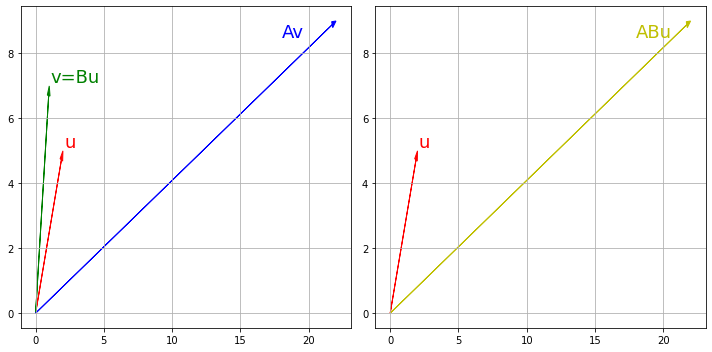

In [13]:
A = np.array([[1, 3],[2,1]])
B = np.array([[-2, 1],[1, 1]])

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)
u = np.array([2, 5])
v = np.dot(B,u)
w = np.dot(A,v)
C = A@B
z = np.dot(C,u)

fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)  
plot_vector2d(u, color="r")
plt.text(2.1, 5.1, "u", color="r", fontsize=18)
plot_vector2d(v, color="g")
plt.text(1.1, 7.1, "v=Bu", color="g", fontsize=18)
plot_vector2d(w, color="b")
plt.text(18,8.5, "Av", color="b", fontsize=18)


plt.grid()
plt.subplot(1, 2, 2)  
plot_vector2d(u, color="r")
plt.text(2.1, 5.1, "u", color="r", fontsize=18)
plot_vector2d(z, color="y")
plt.text(18,8.5, "ABu", color="y", fontsize=18)

plt.grid()
plt.tight_layout()

## Produit par blocs

Soient deux matrices :

- ${\bf A} = ({\bf A_{ij}}), i\in[\![1,m]\!], j\in[\![1, n]\!]$ où ${\bf A_{ij}}\in \mathcal{M}_{m_i,n_j}(\mathbb R)$
- ${\bf B} = ({\bf B_{kl}}),   k\in[\![1, n]\!], l\in[\![1, p]\!]$ où ${\bf B_{kl}}\in \mathcal{M}_{n_k,p_l}(\mathbb R)$
```{index} Produit  ; par blocs
```

Tous les produits ${\bf A_{ik}}{\bf B_{kl}}$ sont bien définis. Le
produit par blocs des matrices ${\bf A}$ et ${\bf B}$ est défini par
${\bf AB}= (({\bf AB})_{il})$ avec :
$(\forall i\in  [\![ 1, m]\!])(\forall l\in  [\![ 1, p]\!])\quad ({\bf AB})_{il}  = \displaystyle\sum_{k=1}^n {\bf A_{ik}B_{kl}}$

L'écriture du produit est la même que dans le paragraphe précédent, mais
la somme fait intervenir des produits de matrices, et non de scalaires.
C'est pourquoi il faut prendre garde à la non commutativité des produits
${\bf A_{ik}B_{kl}}$ et respecter l'ordre des facteurs.

## Inverse d'une matrice

````{prf:definition} Inverse 
```{index} Inverse
```
```{index} Matrice ; inverse
```
Soit ${\bf A}\in \mathcal{M}_{n}(\mathbb{R})$ une matrice carrée
de taille $n$. L'inverse de ${\bf A}$, notée ${\bf A^{-1}}$, est
l'unique matrice (lorsqu'elle existe) telle que
${\bf A}{\bf A^{-1}}={\bf A^{-1}}{\bf A}=\mathbb I.$
````

A noter que l'inverse d'une matrice (carrée) n'existe pas toujours. Pour
assurer l'existence, il faut et il suffit que
${\bf A}{\bf x}={\bf 0}\quad\Leftrightarrow\quad {\bf x}={\bf 0}.$

In [14]:
A = np.array([[2, 0, 7],[-1, -2, -5],[1, 4, -2]])
B = np.linalg.inv(A)
print(B)

[[ 0.70588235  0.82352941  0.41176471]
 [-0.20588235 -0.32352941  0.08823529]
 [-0.05882353 -0.23529412 -0.11764706]]


````{prf:property} Propriétés de l'inverse

1.  (${\bf A^{-1}})^{-1}={\bf A}$

2.  $({\bf AB})^{-1}={\bf B^{-1}}{\bf A^{-1}}$

3.  $({\bf A^\top )^{-1}}=({\bf A^{-1}})^\top$

4.  Si ${\bf C}$ inversible et ${\bf AC}={\bf BC}$ alors
    ${\bf A}={\bf B}$.
````

## Matrices particulières

-   Quand $m=n$, on parle de matrice carrée.

-   Si $m=n$, la matrice ${\bf A}$ telle que $(\forall i\neq j) a_{ij}=0$ est une matrice diagonale.

-   Si $m=n$, la matrice ${\bf A}$ telle que
    $(\forall i\in  [\![ 1,n]\!]) (\forall j\in  [\![ 1, i-1]\!])$
    (resp. $(\forall j\in  [\![ i+1,n]\!])$) $a_{ij}=0$ est une matrice
    triangulaire supérieure (resp. inférieure).

-   Si $m=n$ et $(\forall i,j\in  [\![ 1, m]\!]) a_{ij} = a_{ji}$, la
    matrice ${\bf A}$ est dite symétrique.

-   Si $m=n$ et ${\bf A^T}{\bf A} = {\bf A}{\bf A^T} = \mathbb I$,
    ${\bf A}$ est une matrice orthogonale

-   si $m=1$, la matrice est un vecteur ligne. C'est la transposée d'un
    vecteur de $\mathbb R^n$.

-   si $n=1$, la matrice est un vecteur de $\mathbb R^m$.

-   Une sous-matrice d'une matrice ${\bf A}$ est une matrice obtenue en
    supprimant certaines lignes et certaines colonnes de ${\bf A}$. En
    particulier, si on supprime les lignes et colonnes associées au même
    sous-ensemble d'indices de $[\![1,n]\!]$ d'une matrice carrée de
    taille $n$, on obtient une sous-matrice principale. Les déterminants
    des sous-matrices principales sont les mineurs de la matrice.

````{tab-set}
```{tab-item} Diagonale 
$\begin{pmatrix}3&0&0\\0&-4&0\\0&0&1\end{pmatrix}$ 
```

```{tab-item} Triang. sup. 
$\begin{pmatrix} 3&2&1\\0&-4&2\\0&0&1 \end{pmatrix}$

```

```{tab-item} Triang. inf.
$\begin{pmatrix}3&0&0\\1&-4&0\\5&8&1 \end{pmatrix}$
```
```{tab-item} Vecteur ligne 
$\begin{pmatrix}3&2&1&-4&0&3.5 \end{pmatrix}$ 
```
````

## Image de ${\bf A}$

Une matrice ${\bf A}\in\mathcal{M}_{m,n}(\mathbb{R})$ représente une
transformation linéaire de $\mathbb R^n$ dans $\mathbb R^m$. Pour tout
${\bf x}\in\mathbb R^n$, on définit l'image de ${\bf x}$ par la
transformation ${\bf A}$ comme le vecteur ${\bf y}\in \mathbb R^m$ tel que
${\bf y}={\bf A}{\bf x}=\sum_{j=1}^n {\bf A_{\bullet j}}x_j,\quad {\bf A_{\bullet j}}\in\mathbb R^m,\ j\in  [\![ 1, n]\!].$

````{prf:definition}  Image d'une matrice 
```{index} Image
```
```{index} Matrice ; image
```
Le sous-espace de $\mathbb R^m$ engendré par les
colonnes de ${\bf A}$ est appelé *sous-espace image* de ${\bf A}$, noté
$\mathrm{Im}({\bf A})$.
````

C'est donc l'ensemble des ${\bf y}$ de $\mathbb R^m$ qui s'écrivent sous la
forme ${\bf A}{\bf x}$ pour un certain ${\bf x}$ de $\mathbb R^n$.\
$\mathrm{Im}({\bf A})$ est clairement un sous-espace vectoriel de
$\mathbb R^m$.

In [15]:
from sympy import init_printing, Matrix, symbols
init_printing(use_latex = 'mathjax') 

A = Matrix([[1, 2, 3, 1], [1, 1, 2, 1], [1, 2, 3, 1]])
imA = A.columnspace() 
print("L'image de A est le sous-espace engendré par ")
imA

L'image de A est le sous-espace engendré par 


⎡⎡1⎤  ⎡2⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥, ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣1⎦  ⎣2⎦⎦

````{prf:definition} Rang d'une matrice 
```{index} Rang
```
```{index} Matrice ; rang
```
Soit ${\bf A}\in \mathcal{M}_{m,n}(\mathbb{R})$ Le
rang de ${\bf A}$, noté $\mathrm{rang}({\bf A})$, est le nombre maximal
de colonnes de ${\bf A}$ linéairement indépendantes. C'est aussi le
nombre maximal de lignes linéairement indépendantes. On a donc
$\mathrm{rang}({\bf A})\le \min\{m,n\}.$
````

In [16]:
A = np.array([[2, 0, 7],[-1, -2, -5],[1, 4, -2]])
print("Rang de A = ",np.linalg.matrix_rank(A))

Rang de A =  3


De la définition précédente, on tire le résultat fondamental suivant
$\dim\left(\mathrm{Im}({\bf A})\right)=\mathrm{rang}({\bf A}).$

````{prf:example} 

Soit ${\bf A}=\begin{pmatrix} 1&0&-2\\0&1&0\\-1&0&2\end{pmatrix}$.\
Manifestement, la première et la troisième colonne sont liées, tandis que
les deux premières sont linéairement indépendantes. ${\bf A}$, qui
réalise une transformation linéaire de $\mathbb R^3$ dans $\mathbb R^3$, a
donc pour image le plan
$lin\left (\begin{pmatrix}1\\0\\-1 \end{pmatrix},\begin{pmatrix} 0\\1\\0 \end{pmatrix}  \right )$.\
${\bf A}$ est donc de rang 2.
````